 *PROJET 4 - Akakou Laura - NOTEBOOK* 

In [1]:
import pandas as pd
import numpy as np 
import datetime
nutrition = pd.read_csv("sous_nutrition.csv")
dispo = pd.read_csv("dispo_alimentaire.csv")
population = pd.read_csv("population.csv")
aide = pd.read_csv("aide_alimentaire.csv")

In [2]:
dispo = dispo.fillna (0)

*QUESTION 1 : La proportion de personnes en état de sous-nutrition*

In [3]:
# Afin de pouvoir exécuter mes calculs, je remplace la valeur '<0.1' par 0 (on peut la considérer comme suffisamment faible)
nutrition.loc[nutrition['Valeur'] == '<0.1', 'Valeur'] = np.nan
nutrition['Valeur'] = pd.to_numeric(nutrition['Valeur'])
nutrition['Valeur'] = nutrition['Valeur']. fillna(0)

In [4]:
# Dans la table 'nutrition', je selectionne seulement les valeurs correspondantes à l'année '2016-2018' = 2017
# Je nomme cette nouvelle table "nutrition2017"
nutrition2017 = nutrition[nutrition['Année']=='2016-2018']
print(nutrition2017)

                                        Zone      Année  Valeur
4                                Afghanistan  2016-2018    10.5
10                            Afrique du Sud  2016-2018     3.1
16                                   Albanie  2016-2018     0.1
22                                   Algérie  2016-2018     1.3
28                                 Allemagne  2016-2018     0.0
...                                      ...        ...     ...
1192  Venezuela (République bolivarienne du)  2016-2018     8.0
1198                                Viet Nam  2016-2018     6.5
1204                                   Yémen  2016-2018     0.0
1210                                  Zambie  2016-2018     0.0
1216                                Zimbabwe  2016-2018     0.0

[203 rows x 3 columns]


In [5]:
# Dans la table 'population', je selectionne également les valeurs correspondantes à l'année 2017
# Je nomme cette nouvelle table "population2017"
population2017 = population[population['Année']==2017]
print(population2017)

                                        Zone  Année     Valeur
4                                Afghanistan   2017  36296.113
10                            Afrique du Sud   2017  57009.756
16                                   Albanie   2017   2884.169
22                                   Algérie   2017  41389.189
28                                 Allemagne   2017  82658.409
...                                      ...    ...        ...
1390  Venezuela (République bolivarienne du)   2017  29402.484
1396                                Viet Nam   2017  94600.648
1402                                   Yémen   2017  27834.819
1408                                  Zambie   2017  16853.599
1414                                Zimbabwe   2017  14236.595

[236 rows x 3 columns]


In [6]:
# J'effectue une jointure entre les deux nouvelles tables. 
ssnutri2017 = pd.merge(nutrition2017, population2017, on='Zone', how='outer')
ssnutri2017.head(5)

,Zone,Année_x,Valeur_x,Année_y,Valeur_y
0,Afghanistan,2016-2018,10.5,2017,36296.113
1,Afrique du Sud,2016-2018,3.1,2017,57009.756
2,Albanie,2016-2018,0.1,2017,2884.169
3,Algérie,2016-2018,1.3,2017,41389.189
4,Allemagne,2016-2018,0.0,2017,82658.409


In [7]:
# Je calcule le nombre total de personne en état de sous-nutrition en additionnant l'ensemble des valeurs de la colonne Valeur_x
# Je multiplie par 1 000 000 et j'arrondie 
totalnutri = round((ssnutri2017['Valeur_x'].sum())*1000000,1)
print(f"{totalnutri} de personnes sont en état de sous-nutrition en 2017.")

535700000.0 de personnes sont en état de sous-nutrition en 2017.


In [8]:
# Même procédé afin de trouver la population mondiale en 2017
# Je multiplie par 1000 pour avoir une population en milliard

totalpop = round((ssnutri2017['Valeur_y'].sum())*1000,1)
print(f"La population mondiale en 2017 est de {totalpop} de personnes.")

La population mondiale en 2017 est de 7548134111.0 de personnes.


In [9]:
# Le calcul final est le suivant : 
calculfinal = round((totalnutri*100)/(totalpop),2)
print(f"La proportion de personne en état de sous-nutrition en 2017 est de {calculfinal} pourcent.")

La proportion de personne en état de sous-nutrition en 2017 est de 7.1 pourcent.


535 700 000 de personnes dans le monde sont en état de sous-nutrition en 2017 soit 7.1% de la population mondiale.

*QUESTION 2 : Le nombre théorique de personnes qui pourraient être nourries*

In [10]:
# Dans la table 'dispo', je regroupe par Pays ('Zone'). Je nomme cette nouvelle table 'dispo1'
# La table population filtrée sur l'année 2017 est déjà existante (cf question précédente)
dispo1 = dispo.groupby(['Zone']).sum()
dispop = pd.merge(dispo1, population2017, on='Zone', how='outer')
dispop.head(5)

,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Valeur
0,Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0,2017.0,36296.113
1,Afrique du Sud,5309.0,876.0,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0,2017.0,57009.756
2,Albanie,660.0,174.0,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0,2017.0,2884.169
3,Algérie,4352.0,1707.0,3293.0,809.13,76.48,91.92,42630.0,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0,2017.0,41389.189
4,Allemagne,30209.0,7711.0,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0,2017.0,82658.409


In [11]:
# Il faut multiplier la dispo alimentaire de chaque pays par sa population 
# Faire la somme de ces résultats 
# Divisier par 2500 (2500 étant le nombre de calories qu'un adulte doit normalement consommer dans une journée)
dispoali = dispop['Disponibilité alimentaire (Kcal/personne/jour)']
pop = dispop['Valeur']
kcal = 2500
calcul = dispoali*(pop*1000)

final = round((calcul.sum()/kcal), 2)
print(f"Le nombre théorique de personnes qui pourraient être nourries est de {final} personnes.")

Le nombre théorique de personnes qui pourraient être nourries est de 8367593850.93 personnes.


*QUESTION 3 : le nombre théorique de personnes qui pourraient être nourries (disponibilité alimentaire des produits végétaux)*

In [12]:
# Je filtre la table 'dispo' selon l'origine. Ici par 'vegetale'
# Je regroupe par Pays et Origine
dispoveg = dispo[dispo['Origine'] == 'vegetale']
dispoveg.groupby(['Zone', 'Origine']).sum() # ou dispoveg.groupby(['Zone']).agg('sum')

,,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,Origine,,,,,,,,,,,,,,,
Afghanistan,vegetale,645.0,415.0,1871.0,271.49,18.27,46.05,10884.0,278.0,2638.0,8293.0,1072.0,8891.0,393.0,63.0,-368.0
Afrique du Sud,vegetale,5122.0,761.0,2533.0,425.17,48.92,48.94,53439.0,10586.0,6468.0,22441.0,2110.0,55649.0,186.0,22819.0,1912.0
Albanie,vegetale,559.0,172.0,2203.0,706.49,38.76,51.96,3326.0,84.0,846.0,2241.0,182.0,2609.0,55.0,113.0,-45.0
Algérie,vegetale,4352.0,1706.0,2915.0,632.35,54.12,66.94,35510.0,649.0,14672.0,24797.0,3587.0,21964.0,428.0,637.0,-479.0
Allemagne,vegetale,28122.0,6842.0,2461.0,568.82,63.63,39.90,126866.0,34454.0,50642.0,47079.0,3717.0,110926.0,1475.0,39686.0,-247.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,vegetale,1174.0,2619.0,2718.0,473.18,53.00,62.81,9623.0,3326.0,12546.0,4426.0,675.0,780.0,0.0,804.0,-376.0
Équateur,vegetale,1001.0,1905.0,1732.0,327.21,49.48,24.80,14926.0,7142.0,1475.0,5149.0,654.0,20042.0,125.0,6200.0,555.0
États-Unis d'Amérique,vegetale,145289.0,145102.0,2698.0,590.68,93.68,39.65,632023.0,140442.0,69522.0,189122.0,6937.0,740194.0,9030.0,140986.0,-37242.0


In [13]:
# La table population filtrée sur l'année 2017 existe déjà.
# J'effectue une jointure entre les deux nouvelles tables

dispoaliveg = pd.merge(dispoveg, population2017, on='Zone', how='outer')
dispoaliveg.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Valeur
0,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0,2017.0,36296.113
1,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296.113
2,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296.113
3,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296.113
4,Afghanistan,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,0.00,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296.113


In [14]:
popveg = dispoaliveg['Valeur']
veg = dispoaliveg['Disponibilité alimentaire (Kcal/personne/jour)']
kcal = 2500

calculveg = (veg)*(popveg*1000)
finalveg = round((calculveg.sum()/kcal),2)

print(f"Le nombre théorique de personnes qui pourraient être nourries est de {finalveg} personnes (dispo végétale).")

Le nombre théorique de personnes qui pourraient être nourries est de 6904305684.6 personnes (dispo végétale).


*QUESTION 4 : Dispo intérieure attribuée à l’alimentation animale, 
Celle perdue, 
Celle concrètement utilisée pour l'alimentation humaine*

In [15]:
# Je calcule la disponibilité intérieure totale en faisant la somme 
totaldint = dispo['Disponibilité intérieure'].sum() # ou dispo['Disponibilité intérieure'].agg('sum')
print(f"La disponibilité totale intérieure est de {totaldint}.")

La disponibilité totale intérieure est de 9848994.0.


In [16]:
# Je calcule la part attribuée à l'alimentation animale
animal = dispo['Aliments pour animaux'].sum()
animal

1304245.0

In [17]:
proportionanimal= round(((animal/totaldint)*100), 2)
print(f"La proportion de la disponibilité intérieure attribuée à l'alimentation animale est de {proportionanimal}%.")

La proportion de la disponibilité intérieure attribuée à l'alimentation animale est de 13.24%.


In [18]:
# De même pour l'alimentation humaine 
humain = dispo['Nourriture'].sum()
humain

4876258.0

In [19]:
proportionhumain = round(((humain/totaldint)*100), 2)
print(f"La proportion concrétement attribuée à l'alimentation humaine est de {proportionhumain}%.")

La proportion concrétement attribuée à l'alimentation humaine est de 49.51%.


In [20]:
# De même pour la perte 
perte = dispo['Pertes'].sum()
perte


453698.0

In [21]:
proportionperte = round(((perte/totaldint)*100), 2)
print(f"La proportion de la disponibilité intérieure perdue est de {proportionperte}%.")

La proportion de la disponibilité intérieure perdue est de 4.61%.


*La disponibilité intérieure attribué à l'alimentation animale est 13.24%, celle perdue est de 4.61% et celle attribuée à 
l'alimentation humaine est de 49.51%*

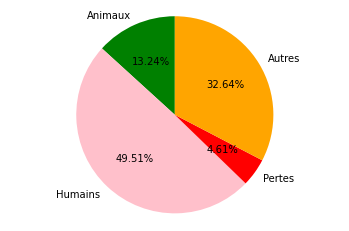

In [22]:
import matplotlib.pyplot as plt

labels = 'Animaux', 'Humains', 'Pertes', 'Autres'
sizes = [13.24, 49.51, 4.61, 32.64]
colors = ['green', 'pink', 'red', 'orange']

plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.2f%%', shadow=False, startangle=90)

plt.axis('equal')
plt.show()

*QUESTION 5 : Pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017 (top 5)*

In [23]:
ssnutri2017.head()

,Zone,Année_x,Valeur_x,Année_y,Valeur_y
0,Afghanistan,2016-2018,10.5,2017,36296.113
1,Afrique du Sud,2016-2018,3.1,2017,57009.756
2,Albanie,2016-2018,0.1,2017,2884.169
3,Algérie,2016-2018,1.3,2017,41389.189
4,Allemagne,2016-2018,0.0,2017,82658.409


In [24]:
paysssnut = (ssnutri2017.Valeur_x)*1000000
payspop = (ssnutri2017.Valeur_y)*1000

payscalcul = round((paysssnut/payspop)*100,2)

paysssnutri2017=ssnutri2017.assign(Proportion=payscalcul)

paysssnutri2017.head(15)

top5 = paysssnutri2017.sort_values(by='Proportion', ascending=False).head(5)
top5


,Zone,Année_x,Valeur_x,Année_y,Valeur_y,Proportion
78,Haïti,2016-2018,5.3,2017,10982.366,48.26
157,République populaire démocratique de Corée,2016-2018,12.0,2017,25429.825,47.19
108,Madagascar,2016-2018,10.5,2017,25570.512,41.06
103,Libéria,2016-2018,1.8,2017,4702.226,38.28
100,Lesotho,2016-2018,0.8,2017,2091.534,38.25


In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

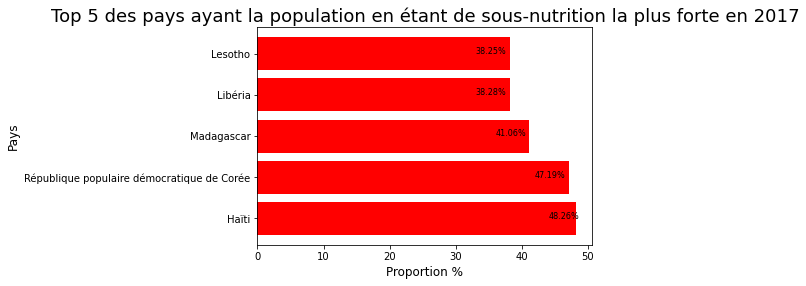

In [26]:
plt.barh(y=top5['Zone'], width=top5['Proportion'], color='red')
top5.sort_values('Proportion', ascending=False)
plt.xlabel('Proportion %', fontsize=12)
plt.ylabel('Pays', fontsize=12)
plt.title('Top 5 des pays ayant la population en étant de sous-nutrition la plus forte en 2017', fontsize=18)
plt.annotate('48.26%', xy=(44,'Haïti'), fontsize=8)
plt.annotate('47.19%', xy=(42,'République populaire démocratique de Corée'), fontsize=8)
plt.annotate('41.06%', xy=(36,'Madagascar'), fontsize=8)
plt.annotate('38.28%', xy=(33,'Libéria'), fontsize=8)
plt.annotate('38.25%', xy=(33,'Lesotho'), fontsize=8)
plt.show()


*QUESTION 6 : Pays ayant le plus bénéficié d’aide depuis 2013*

In [27]:
aide2013 = aide.groupby(by='Pays bénéficiaire').agg('sum')
aide2013.sort_values(by='Valeur', ascending=False).head(5)

,Année,Valeur
Pays bénéficiaire,,
République arabe syrienne,76543,1858943
Éthiopie,66460,1381294
Yémen,76553,1206484
Soudan du Sud,44309,695248
Soudan,48335,669784


*QUESTION 7 : Pays ayant le plus/le moins de disponibilité/habitant*

In [28]:
dispo.groupby(by='Zone').agg('sum').sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=False).head(10)

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,
Autriche,3412.0,1001.0,3770.0,1069.20,170.44,106.20,19308.0,6733.0,8463.0,9085.0,459.0,18129.0,173.0,5178.0,-556.0
Belgique,5533.0,3226.0,3737.0,1002.09,161.95,99.37,29358.0,30345.0,35276.0,11134.0,564.0,24496.0,153.0,8960.0,-64.0
Turquie,17750.0,3006.0,3708.0,968.15,119.64,108.12,131377.0,14593.0,12136.0,72551.0,12036.0,137432.0,2553.0,23560.0,-3599.0
États-Unis d'Amérique,148432.0,154699.0,3682.0,1002.39,161.37,109.42,777992.0,163524.0,81887.0,320889.0,7162.0,894668.0,10403.0,141010.0,-35032.0
Israël,2525.0,801.0,3610.0,922.14,151.39,128.00,11267.0,1648.0,5883.0,7132.0,220.0,6906.0,71.0,564.0,128.0
Irlande,3758.0,1120.0,3602.0,1150.15,125.69,109.91,10738.0,6828.0,6254.0,5320.0,236.0,11501.0,89.0,399.0,-192.0
Italie,16144.0,3228.0,3578.0,993.20,154.69,108.49,97405.0,23643.0,38692.0,60584.0,1861.0,80855.0,736.0,14870.0,1496.0
Luxembourg,147.0,11.0,3540.0,1150.66,141.49,113.64,802.0,821.0,1076.0,607.0,11.0,593.0,9.0,24.0,-41.0
Égypte,15084.0,2262.0,3518.0,803.79,63.09,103.22,115133.0,5014.0,24100.0,65957.0,7608.0,95848.0,1365.0,22924.0,199.0


In [29]:
dispo.groupby(by='Zone').agg('sum').sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=True).head(10)

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,
République centrafricaine,1.0,27.0,1879.0,453.73,59.41,46.04,2582.0,0.0,76.0,2092.0,122.0,2503.0,63.0,278.0,3.0
Zambie,408.0,69.0,1924.0,350.12,42.05,55.22,10041.0,675.0,380.0,5088.0,242.0,10526.0,76.0,4178.0,-182.0
Madagascar,842.0,2522.0,2056.0,425.07,24.49,46.69,15216.0,236.0,924.0,9741.0,966.0,14160.0,375.0,844.0,375.0
Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0
Haïti,481.0,115.0,2089.0,397.78,48.92,47.70,6175.0,15.0,1204.0,4101.0,679.0,5072.0,36.0,762.0,-77.0
République populaire démocratique de Corée,816.0,695.0,2093.0,458.93,36.41,54.99,14876.0,83.0,993.0,11425.0,1066.0,13883.0,194.0,678.0,84.0
Tchad,104.0,2.0,2109.0,319.45,47.10,62.75,5304.0,0.0,290.0,4097.0,459.0,5153.0,101.0,542.0,-141.0
Zimbabwe,131.0,23.0,2113.0,336.59,57.18,48.32,9507.0,278.0,1342.0,4762.0,188.0,7914.0,76.0,4330.0,531.0
Ouganda,348.0,68.0,2126.0,535.58,46.57,52.64,26624.0,1218.0,1257.0,20121.0,991.0,26321.0,154.0,4982.0,269.0


*QUESTION 8 : Répartition des céréales*

In [30]:
dispo['Produit'].unique()

array(['Abats Comestible', 'Agrumes, Autres', 'Aliments pour enfants',
       'Ananas', 'Bananes', 'Beurre, Ghee', 'Bière', 'Blé',
       'Boissons Alcooliques', 'Café', 'Coco (Incl Coprah)', 'Crème',
       'Céréales, Autres', 'Dattes', 'Edulcorants Autres',
       'Feve de Cacao', 'Fruits, Autres', 'Graines de coton',
       'Graines de tournesol', 'Graisses Animales Crue',
       'Huil Plantes Oleif Autr', 'Huile Graines de Coton',
       "Huile d'Arachide", "Huile d'Olive", 'Huile de Colza&Moutarde',
       'Huile de Palme', 'Huile de Soja', 'Huile de Sésame',
       'Huile de Tournesol', 'Lait - Excl Beurre', 'Légumes, Autres',
       'Légumineuses Autres', 'Maïs', 'Miel', 'Millet', 'Miscellanees',
       'Noix', 'Oeufs', 'Olives', 'Oranges, Mandarines', 'Orge',
       'Plantes Oleiferes, Autre', 'Poissons Eau Douce', 'Poivre',
       'Pommes', 'Pommes de Terre', 'Raisin', 'Riz (Eq Blanchi)',
       'Sucre Eq Brut', 'Sucre, betterave', 'Sucre, canne', 'Sésame',
       'Thé', 'Toma

In [31]:
cereale = ['Blé', 'Seigle', 'Orge', 'Avoine', 'Maïs', 'Riz (Eq Blanchi)', 'Sorgho', 'Millet', 'Céréales, Autres']

In [32]:
repartition = dispo[dispo['Produit'].isin(cereale)]


In [33]:
disporepart = repartition['Disponibilité intérieure'].agg('sum')
nourrirepart = repartition['Nourriture'].agg('sum')
animalrepart = repartition['Aliments pour animaux'].agg('sum')
perterepart = repartition['Pertes'].agg('sum')
autrerepart = repartition['Autres Utilisations'].agg('sum')
semencerepart = repartition['Semences'].agg('sum')
traitementrepart = repartition['Traitement'].agg('sum')

In [34]:
cerealeanimal = round((animalrepart/disporepart)*100,1)
print(f"La proprition de céréales attribuée à l'alimentation animale est de {cerealeanimal}%.")

La proprition de céréales attribuée à l'alimentation animale est de 36.3%.


In [35]:
cerealnourriture = round((nourrirepart/disporepart)*100,1)
print(f"La proprition de céréales attribuée à l'alimentation humaine est de {cerealnourriture}%.")

La proprition de céréales attribuée à l'alimentation humaine est de 42.8%.


In [36]:
cerealeperte = round((perterepart/disporepart)*100,2)
cerealeperte

4.45

In [37]:
cerealeautre = round((autrerepart/disporepart)*100,2)
cerealeautre

9.75

In [38]:
semenceautre = round((semencerepart/disporepart)*100,2)
semenceautre

2.85

In [39]:
traitementautre = round((traitementrepart/disporepart)*100,2)
traitementautre

3.93

*QUESTION 9 : L'utilisation du manioc en Thaïlande*

In [42]:
dispothai = dispo[(dispo['Zone']=="Thaïlande") & (dispo['Produit']=='Manioc')]
populationthai = population[(population['Zone']=='Thaïlande') & (population['Année']==2017)]
thai = pd.merge(dispothai, populationthai, on='Zone', how='outer')
thai.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Valeur
0,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,0.0,0.0,0.0,2017,69209.81


In [43]:
nutritionthai = nutrition[(nutrition['Zone']=='Thaïlande')&(nutrition['Année']=='2016-2018')]
print(nutritionthai)

           Zone      Année  Valeur
1114  Thaïlande  2016-2018     6.2


In [45]:
valthai = thai['Valeur']
dispothai = thai['Disponibilité alimentaire (Kcal/personne/jour)']
kcalthai = 2500

calculthai = ((valthai*1000)*(dispothai))/kcalthai

print(calculthai)

0    1107356.96
dtype: float64


In [48]:
(thai['Exportations - Quantité']/thai['Production'])*100

0    83.41273
dtype: float64

*QUESTION 10 : Concernant le calcul de la disponibilité intérieure*
    

1) disponibilité intérieure = Production + importations - exportations + variations des stocks


2) disponibilité intérieure = Aliments pour animaux + Autres Utilisations + Nourriture + Pertes + Semences + traitement